In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

cospi = pd.read_csv("./cospi.csv")

In [2]:
cospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    247 non-null    object
 1   Open    247 non-null    int64 
 2   High    247 non-null    int64 
 3   Low     247 non-null    int64 
 4   Close   247 non-null    int64 
 5   Volume  247 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.7+ KB


In [3]:
cospi.head()

,Date,Open,High,Low,Close,Volume
0,26-Feb-16,1180000,1187000,1172000,1172000,176906
1,25-Feb-16,1172000,1187000,1172000,1179000,128321
2,24-Feb-16,1178000,1179000,1161000,1172000,140407
3,23-Feb-16,1179000,1189000,1173000,1181000,147578
4,22-Feb-16,1190000,1192000,1166000,1175000,174075


In [4]:
cospi.tail()

,Date,Open,High,Low,Close,Volume
242,06-Mar-15,1414000,1449000,1406000,1442000,234312
243,05-Mar-15,1439000,1443000,1417000,1422000,191913
244,04-Mar-15,1411000,1440000,1410000,1437000,231146
245,03-Mar-15,1435000,1437000,1406000,1418000,251018
246,02-Mar-15,1375000,1423000,1367000,1423000,425208


In [5]:
# 시간을 문자열로 출력하려면 strftime 메서드를 사용하면 된다.
import datetime
 
now = datetime.datetime.now()
print(now)          # 2018-07-28 12:11:32.669083

nowDate = now.strftime('%Y-%m-%d')
print(nowDate)      # 2018-07-28
 
nowTime = now.strftime('%H:%M:%S')
print(nowTime)      # 12:11:32
 
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)  # 2018-07-28 12:11:32


2020-12-02 10:44:02.540341
2020-12-02
10:44:02
2020-12-02 10:44:02


In [6]:
# 미국식 날짜 -> 한국식 날짜
# ex) 8-2-2019 -> 2019-08-02
sdate = '26-Feb-16'
Thistime = datetime.datetime.strptime(sdate, '%d-%b-%y')   # (2016, 2, 26, 0, 0)


print(type(Thistime)) # [class 'datetime.datetime']
print(Thistime)


<class 'datetime.datetime'>
2016-02-26 00:00:00


In [7]:
date = cospi['Date']
len(date) # 247


247

In [8]:
# list 내포
kdate = [ datetime.datetime.strptime(d, '%d-%b-%y') for d in date ]
kdate


[datetime.datetime(2016, 2, 26, 0, 0),
 datetime.datetime(2016, 2, 25, 0, 0),
 datetime.datetime(2016, 2, 24, 0, 0),
 datetime.datetime(2016, 2, 23, 0, 0),
 datetime.datetime(2016, 2, 22, 0, 0),
 datetime.datetime(2016, 2, 19, 0, 0),
 datetime.datetime(2016, 2, 18, 0, 0),
 datetime.datetime(2016, 2, 17, 0, 0),
 datetime.datetime(2016, 2, 16, 0, 0),
 datetime.datetime(2016, 2, 15, 0, 0),
 datetime.datetime(2016, 2, 12, 0, 0),
 datetime.datetime(2016, 2, 11, 0, 0),
 datetime.datetime(2016, 2, 5, 0, 0),
 datetime.datetime(2016, 2, 4, 0, 0),
 datetime.datetime(2016, 2, 3, 0, 0),
 datetime.datetime(2016, 2, 2, 0, 0),
 datetime.datetime(2016, 2, 1, 0, 0),
 datetime.datetime(2016, 1, 29, 0, 0),
 datetime.datetime(2016, 1, 28, 0, 0),
 datetime.datetime(2016, 1, 27, 0, 0),
 datetime.datetime(2016, 1, 26, 0, 0),
 datetime.datetime(2016, 1, 25, 0, 0),
 datetime.datetime(2016, 1, 22, 0, 0),
 datetime.datetime(2016, 1, 21, 0, 0),
 datetime.datetime(2016, 1, 20, 0, 0),
 datetime.datetime(2016, 1, 19

In [9]:
# 날짜 형식 변경
cospi['Date'] = kdate
cospi


,Date,Open,High,Low,Close,Volume
0,2016-02-26,1180000,1187000,1172000,1172000,176906
1,2016-02-25,1172000,1187000,1172000,1179000,128321
2,2016-02-24,1178000,1179000,1161000,1172000,140407
3,2016-02-23,1179000,1189000,1173000,1181000,147578
4,2016-02-22,1190000,1192000,1166000,1175000,174075
...,...,...,...,...,...,...
242,2015-03-06,1414000,1449000,1406000,1442000,234312
243,2015-03-05,1439000,1443000,1417000,1422000,191913
244,2015-03-04,1411000,1440000,1410000,1437000,231146
245,2015-03-03,1435000,1437000,1406000,1418000,251018


<AxesSubplot:title={'center':'Trend line of High column'}>

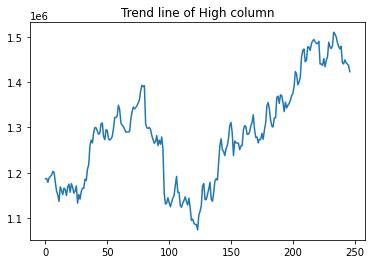

In [10]:
# 2. 시계열 시각화

# 1개 칼럼으로 추세 그래프
cospi['High'].plot(title = 'Trend line of High column')


In [11]:
# index 수정
# 형식 ) data.set_index('인덱스로 사용할 칼럼')
cospi.index # 행 이름 : RangeIndex(start=0, stop=247, step=1)
cospi.head()


,Date,Open,High,Low,Close,Volume
0,2016-02-26,1180000,1187000,1172000,1172000,176906
1,2016-02-25,1172000,1187000,1172000,1179000,128321
2,2016-02-24,1178000,1179000,1161000,1172000,140407
3,2016-02-23,1179000,1189000,1173000,1181000,147578
4,2016-02-22,1190000,1192000,1166000,1175000,174075


In [12]:
# 특정 칼럼 -> index 지정
new_cospi = cospi.set_index('Date')
new_cospi.head()


,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075


In [13]:
# 날짜데이터를 index로 사용하면 연단위, 월단위, 일단위 검색 가능

new_cospi['2016']


,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075
2016-02-19,1187000,1195000,1174000,1190000,175889
2016-02-18,1203000,1203000,1178000,1187000,211795
2016-02-17,1179000,1201000,1169000,1185000,245929
2016-02-16,1158000,1179000,1157000,1168000,179087


In [14]:
new_cospi['2015']



,Open,High,Low,Close,Volume
Date,,,,,
2015-12-30,1260000,1272000,1254000,1260000,203349
2015-12-29,1265000,1266000,1241000,1254000,231802
2015-12-28,1285000,1289000,1266000,1266000,225997
2015-12-24,1295000,1300000,1285000,1285000,151322
2015-12-23,1292000,1299000,1282000,1295000,162043
...,...,...,...,...,...
2015-03-06,1414000,1449000,1406000,1442000,234312
2015-03-05,1439000,1443000,1417000,1422000,191913
2015-03-04,1411000,1440000,1410000,1437000,231146


In [15]:
new_cospi['2016-02']


,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075
2016-02-19,1187000,1195000,1174000,1190000,175889
2016-02-18,1203000,1203000,1178000,1187000,211795
2016-02-17,1179000,1201000,1169000,1185000,245929
2016-02-16,1158000,1179000,1157000,1168000,179087


In [16]:
new_cospi['2016-02':'2016-01']


,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075
2016-02-19,1187000,1195000,1174000,1190000,175889
2016-02-18,1203000,1203000,1178000,1187000,211795
2016-02-17,1179000,1201000,1169000,1185000,245929
2016-02-16,1158000,1179000,1157000,1168000,179087


In [17]:
new_cospi['2016-02-10':'2016-02-01']

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-05,1156000,1169000,1156000,1164000,183280
2016-02-04,1150000,1161000,1148000,1156000,236429
2016-02-03,1150000,1152000,1137000,1146000,174381
2016-02-02,1161000,1166000,1147000,1156000,165420
2016-02-01,1152000,1163000,1151000,1163000,258194


In [18]:
# subset 생성
new_cospi_HL = new_cospi[['High', 'Low']]
new_cospi_HL.head()


,High,Low
Date,,
2016-02-26,1187000,1172000
2016-02-25,1187000,1172000
2016-02-24,1179000,1161000
2016-02-23,1189000,1173000
2016-02-22,1192000,1166000


<AxesSubplot:title={'center':'High vs Low 2016 year'}, xlabel='Date'>

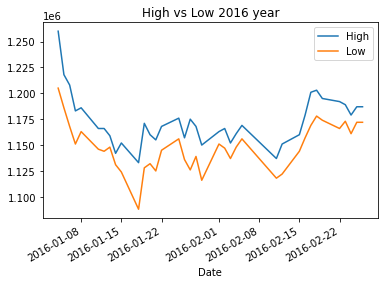

In [19]:
# 년도 기준
new_cospi_HL['2016'].plot(title = 'High vs Low 2016 year')


<AxesSubplot:title={'center':'High vs Low 2016 year 1 month'}, xlabel='Date'>

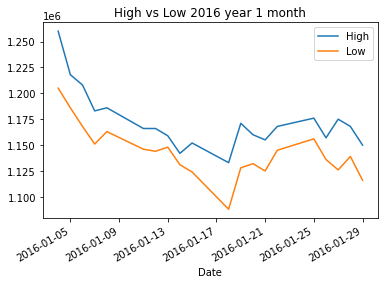

In [20]:
# 월 기준
new_cospi_HL['2016-01'].plot(title = 'High vs Low 2016 year 1 month')


In [21]:
# 3. 이동평균 기능 -> 시각화
# 평활 : 지정한 날짜 단위 평균 -> 이동 
roll_mean5 = pd.Series.rolling(new_cospi_HL['High'], window=5, center = False).mean()
roll_mean10 = pd.Series.rolling(new_cospi_HL['High'], window=10, center = False).mean()
roll_mean20 = pd.Series.rolling(new_cospi_HL['High'], window=20, center = False).mean()
# window는 단위 - 5일 단위, 10일 단위, 20일 단위


<AxesSubplot:xlabel='Date'>

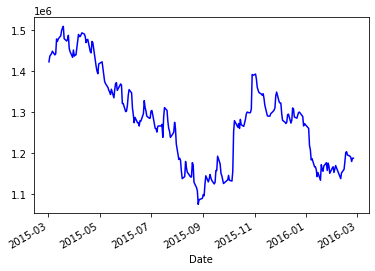

In [22]:
# High 칼럼 추세 그래프
new_cospi_HL['High'].plot(color='blue', label='High Column')


<AxesSubplot:xlabel='Date'>

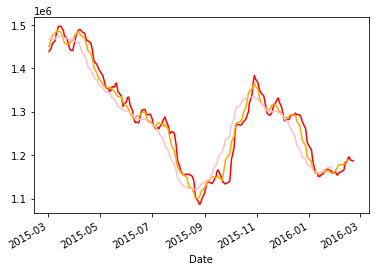

In [23]:
# roll mean 추세 그래프
roll_mean5.plot(color='red', label='5 day rolling mean')
roll_mean10.plot(color='orange', label='10 day rolling mean')
roll_mean20.plot(color='pink', label='20 day rolling mean')


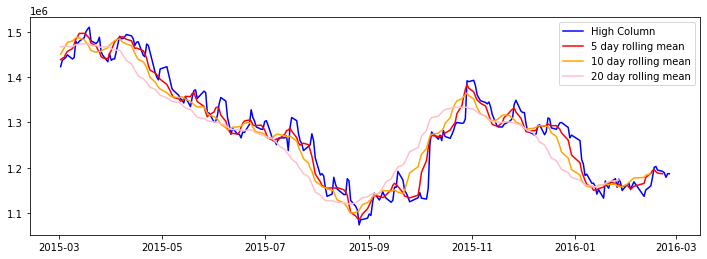

In [24]:
# subplot 적용
fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(new_cospi_HL['High'], color='blue' , label='High Column')
chart.plot(roll_mean5, color='red' , label='5 day rolling mean')
chart.plot(roll_mean10, color='orange' , label='10 day rolling mean')
chart.plot(roll_mean20, color='pink' , label='20 day rolling mean')
plt.legend(loc = 'best')
